<a href="https://colab.research.google.com/github/boxfather78/MLAI/blob/main/20230323_MLAI_Summative_Assessment_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Orange'> 1: Retrieve data for modelling </font> 


In [1]:
# Data stored in a zip file with several folders. 
# A train and Validation Folder each with a folder containing cat images and dog images
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-04-03 19:26:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  29.8MB/s    in 2.2s    

2023-04-03 19:26:51 (29.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Unzip files to local location

import os
import zipfile

os.getcwd()

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
#Define cat/dog train/validation file paths

# Code below gives base directory and adds on folder to directory name for each additional directory
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat & dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our test cat & dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [4]:
#Check Volume of Images (expecting 2k training data and 1k validation data with equal cat/dog images in each)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [5]:
# Check details of first 10 files in each directory
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

val_cat_fnames = os.listdir(val_cats_dir)
print(val_cat_fnames[:10])

val_dog_fnames = os.listdir(val_dogs_dir)
print(val_dog_fnames[:10])

['cat.377.jpg', 'cat.203.jpg', 'cat.619.jpg', 'cat.340.jpg', 'cat.877.jpg', 'cat.892.jpg', 'cat.540.jpg', 'cat.141.jpg', 'cat.20.jpg', 'cat.986.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.2147.jpg', 'cat.2252.jpg', 'cat.2189.jpg', 'cat.2126.jpg', 'cat.2458.jpg', 'cat.2032.jpg', 'cat.2443.jpg', 'cat.2232.jpg', 'cat.2265.jpg', 'cat.2185.jpg']
['dog.2024.jpg', 'dog.2013.jpg', 'dog.2461.jpg', 'dog.2462.jpg', 'dog.2435.jpg', 'dog.2251.jpg', 'dog.2470.jpg', 'dog.2440.jpg', 'dog.2325.jpg', 'dog.2283.jpg']


A **Convolutional Neural Network (CNN)** is a neural network in which at least one layer contains convolutional operations. This is the term used for element-wise multiplication of slices of the input matrix (in our case cat/dog images) using a set of convolutional filters, or kernels, which is followed by summing the values of each filter to create a smaller grid. *(Brownlee, 2019b)*

<font color ='Orange'> Fig1: Diagram showing how convolutional filter works with input image data *(Kumar, 2021)*</font>
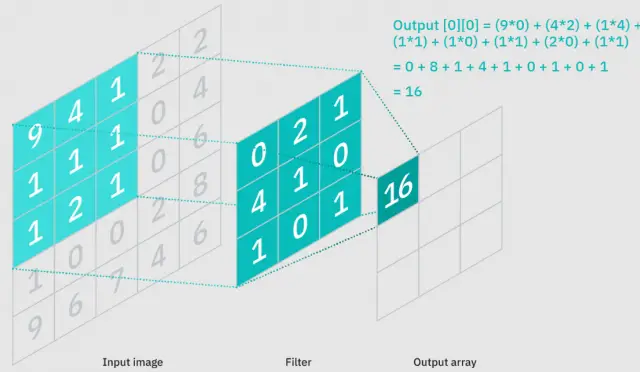

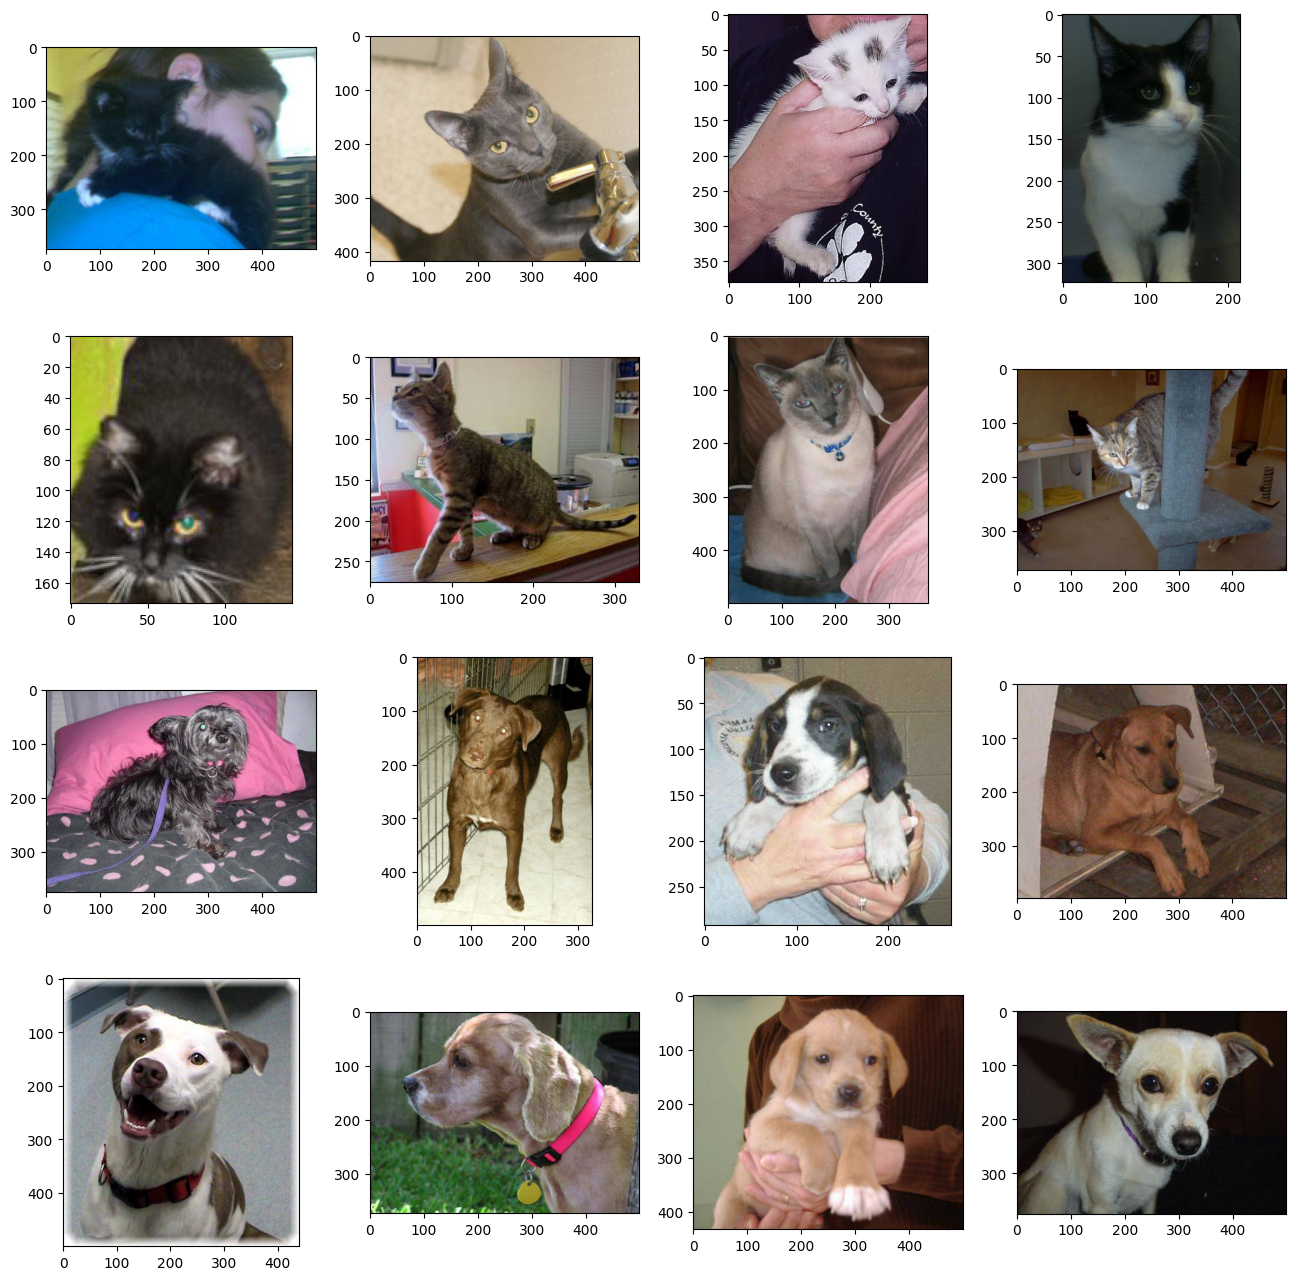

In [6]:
# Use matplotlib to iterate over first 8 images from each train directory and show via plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(16,16)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
# Now to view how the computer sees an example image.
print("Shape of data:",img.shape)
print("Data for first pixel, red hue:",img[0,0,0]) # This is the top left pixel of the first image, value for the Red hue
print("Data for first pixel, all hues:",img[0,0]) # This is the top left pixel for all three colour hues
print("Data for first row pixels, all hues:",img[0]) # This is the full RGB palette for the first row of the image
print("Data for all pixels, all hues:",img) # Finally, the full dataset for the image.

Shape of data: (375, 499, 3)
Data for first pixel, red hue: 31
Data for first pixel, all hues: [31 26 23]
Data for first row pixels, all hues: [[31 26 23]
 [31 26 23]
 [31 26 23]
 ...
 [22 11  5]
 [22 11  5]
 [22 11  5]]
Data for all pixels, all hues: [[[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [22 11  5]
  [22 11  5]
  [22 11  5]]

 [[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [22 11  5]
  [22 11  5]
  [22 11  5]]

 [[31 26 23]
  [31 26 23]
  [31 26 23]
  ...
  [23 12  6]
  [23 12  6]
  [23 12  6]]

 ...

 [[35 31 22]
  [37 33 24]
  [42 38 27]
  ...
  [ 8  6  7]
  [ 8  6  7]
  [ 8  6  7]]

 [[36 32 23]
  [39 35 26]
  [43 39 28]
  ...
  [ 7  5  6]
  [ 7  5  6]
  [ 7  5  6]]

 [[38 34 25]
  [40 36 27]
  [44 40 29]
  ...
  [ 7  5  6]
  [ 7  5  6]
  [ 7  5  6]]]


# <font color='Orange'> 2: Data Preprocessing </font>

The Keras pre-processing ImageDataGenerator function allows 
me to import and adjust data as it flows into my train and validation inputs. Importing and adjusting images in batches reduces the memory required for the task. *(Tensorflow, n.d.)*

I need to normalise data for neural networks for the same reasons as I would for a regression model - to speed up the training rate and stability of a model build *(Sola and Sevilla, 1997)*. As my images are in colour, we saw above that this is represented by 3 numbers between 0-255 across Red, Green and Blue spectrum. I will normalise this to 0-1 simply by dividing by 255, using the rescale parameter. Images are standardised to 150x150 size for the same training rate reasons, but also to reduce computational load and improve model generalisation *(Brownlee, 2019a)*.

To load my data as inputs to my CNN, I can use the flow_from_directory command to create train and validation datasets in batches of 20. This loads both data, and the label (taken from the parent folder in which the image sits). As I am using binary labels, this will give a label of 0 to the first folder (cats) and 1 to dogs.

I'm also saving the resulting images to a folder called 'save' so that I can take a look at the newly resized and scaled images.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalise RGB values (0-255 scale) in Train and Test datasets by dividing by 255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

save_dir = os.mkdir('/tmp/cats_and_dogs_filtered/save')
img_out = os.path.join(base_dir, 'save') # creating folder for saved images, allowing to plot

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images defined above
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        shuffle=True, # Randomly sort images
        save_to_dir = img_out, # Save file to new directory so that we can check resizing.
        save_format="png",
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = False, #We don't want to randomly sort these as we will keep the order to compare vs. predictions
        save_to_dir = img_out,
        save_format="png", 
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(150, 150, 3)


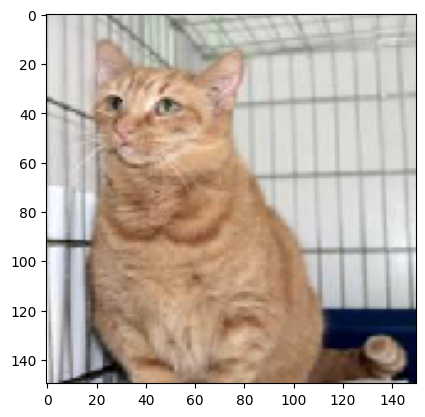

In [10]:
# Take a look at a random resized image (run multiple times to view different images)
from IPython.core.display import display, HTML

batch = next(train_generator)  # returns single batch of images and labels 
img = batch[0][0]   # picks the first image from batch (as we are shuffling folder, it will pick a random image)
plt.imshow(img)   # shows the first image
print(img.shape) # validates the shape of the image

In [11]:
# Looking at how an image is now viewed after reshaping and normalising.
print("Shape of data:",img.shape)
print("Data for first pixel, red hue:",img[0,0,0]) # This is the top left pixel of the image, value for the Red hue
print("Data for first pixel, all hues:",img[0,0]) # This is the top left pixel for all three colour hues
print("Data for first row pixels, all hues:",img[0]) # This is the full RGB palette for the first row of the image
print("Data for all pixels, all hues:",img) # Finally, the full dataset for the image.

Shape of data: (150, 150, 3)
Data for first pixel, red hue: 0.7058824
Data for first pixel, all hues: [0.7058824  0.69803923 0.7019608 ]
Data for first row pixels, all hues: [[0.7058824  0.69803923 0.7019608 ]
 [0.854902   0.8470589  0.85098046]
 [0.83921576 0.8313726  0.8352942 ]
 [0.85098046 0.8431373  0.8470589 ]
 [0.8352942  0.82745105 0.8313726 ]
 [0.82745105 0.8196079  0.8235295 ]
 [0.79215693 0.7843138  0.78823537]
 [0.7137255  0.7058824  0.70980394]
 [0.8000001  0.79215693 0.7960785 ]
 [0.8431373  0.8352942  0.83921576]
 [0.83921576 0.8313726  0.8352942 ]
 [0.86274517 0.8588236  0.8431373 ]
 [0.81568635 0.8117648  0.7960785 ]
 [0.7725491  0.7686275  0.75294125]
 [0.7254902  0.72156864 0.7058824 ]
 [0.8078432  0.80392164 0.78823537]
 [0.8196079  0.81568635 0.8000001 ]
 [0.8000001  0.7960785  0.7803922 ]
 [0.74509805 0.7411765  0.7254902 ]
 [0.68235296 0.6784314  0.6627451 ]
 [0.7176471  0.7137255  0.69803923]
 [0.8117648  0.8078432  0.79215693]
 [0.8117648  0.8078432  0.79215693

#<font color='Orange'> 3: First CNN </font>

## <font color='Blue'> 3.1: Architecture </font>

### Input layer
First, I am ensuring that the input shape can be understood using Keras. This represents the number of elements my array has in each direction. Here it is 150x150x3 based on the image width, height and colour matrix. This means that for each image there are 67,500 elements to analyse. This becomes 135m across the full dataset, multiplied further by the number of feature maps in the first convolutional layer. 

### Convolutional layers
Processing these volumes will need a lot of computational power so I need to start building layers with a small number of feature maps, but can increase these as we shrink the images through maxpooling layers. The convolutional layers look to reduce the volume of information presented to the model without losing too much richness from the datasets. It does this by passing a filter over each layer of each image (Red, Green and Blue hues) to look for specific 'features', creating 3 feature maps for each image and for each filter *(Géron, 2019)*. 

### Activation layers
Each element in the convolutional layer is passed through the reLu activation function, which will help us find non-linear relationships in the data by keeping the details with the strongest characteristics and reducing negative values to 0. 

### Pooling
Each convolution is followed by a pooling layer which reduces 4 pixels down to one and aims to avoid model overfitting by keeping the most vivid (highest pixel value) detail from each part of an image, also reducing the image size to take to the next convolutional layer. *(Qayyam, 2022)*

### Filter parameters
As a base model I will create a network with three layers, each containing convolution, reLu and maxpool. Since the image size is 150x150, the initial convolutional filter will be a standard 3x3 window with a single stride, meaning no part of the image is skipped and no padding of the image. My maxpool layer will be 2x2, helping to reduce the volume of activations from the previous layer and reduce model overfitting. 

My first convolution uses 16 filters, followed by 32, with the last one using 64 filters. As each image reduces in size, the network will need less computational power, hence a higher number of filters can be accommodated, which gives me a greater chance of building feature maps that pick out important aspects of each image.

### Fully connected layers
I need to flatten the output into a one-dimensional vector to feed into my fully connected layer, which will have 512 hidden units, followed by another activation function to produce a final set of outputs. By now, the flattened image size is 18,496, so I can have one fully connected layer with 512 hidden units, resulting in 9.47m neurons. 

Finally, a Sigmoid **activation** is needed so that the output of my network will be a single value between 0 and 1, helping us understand the probability of the prediction being the positive class.

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Here I am programming the chosen CNN architecture
# 150x150x3 should be used to represent input feature map
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3 followed by max-pooling layer with a 2x2 window
# The stride refers to the number of pixels moved by the filter, while 'valid' padding means no white space will
# be added, hence the image will decrease in size. Both stride and padding values are default, so are shown
# here for demonstration purposes.
x = layers.Conv2D(16, (3, 3), activation='relu', strides=(1), padding='same')(img_input)
x = layers.MaxPooling2D(2, 2)(x)

# Second convolution extracts 32 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

# Third convolution extracts 64 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

#  Output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
model = Model(img_input, output)


The table below summarises my model architecture, showing how the initial input shape decreases in size through max-pooling and padding, while the number of feature maps increases based on the number of filters used at each stage.

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

## <font color='Blue'> 3.2: Hyperparameters </font>

**Activation Function**
As mentioned, I am using ReLu activation for my convolution layers as this will help discover non-linear relationships in the data. I am using Sigmoid as the final activation function as this is a binary classification problem. 

**Loss Function**
I will train the model using binary_crossentropy loss - an effective measure for binary classification as it considers the probabilities underlying outputs, so is a measure of uncertainty in this respect. If probabilities are closer to 1 or 0, the Logloss will be closer to zero *(Zammito, 2019)*.

**Loss Optimiser**
I will use the Adam loss optimiser as this adjusts the learning rate dynamically based on the history of gradient descent, helping us get to the lowest loss number faster. 

**Learning Rate** 
An initial learning rate of 0.001 will drive a reasonable pace of convergence towards the optimal loss.

**Evaluation Metric**
During training, I will monitor classification accuracy and afterwards validate where the model performs well using a confusion matrix.

**Epochs**
I will initially use 10 epochs so that the initial build and assessment doesn't take too long.
 
**Drop-out**
I will begin without a dropout, which randomly replaces the value of some neurons with zero to try and stimulate more generalised networks. I will first see how this architecture performs.

In [15]:
# Compile the model with specified loss, loss optimiser and evaluation metric
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
# Train the model by loading all 2000 images in batches, using the validation data to check generalisation.
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images / batch_size (20) = steps
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,  # 1000 images / batch_size (20) = steps
      verbose=2) # show detail as one line per epoch

Epoch 1/10
100/100 - 41s - loss: 0.7358 - accuracy: 0.5225 - val_loss: 0.6696 - val_accuracy: 0.6120 - 41s/epoch - 412ms/step
Epoch 2/10
100/100 - 31s - loss: 0.6369 - accuracy: 0.6405 - val_loss: 0.6706 - val_accuracy: 0.6340 - 31s/epoch - 306ms/step
Epoch 3/10
100/100 - 30s - loss: 0.5822 - accuracy: 0.7045 - val_loss: 0.6166 - val_accuracy: 0.6610 - 30s/epoch - 301ms/step
Epoch 4/10
100/100 - 31s - loss: 0.5297 - accuracy: 0.7420 - val_loss: 0.5892 - val_accuracy: 0.6860 - 31s/epoch - 305ms/step
Epoch 5/10
100/100 - 30s - loss: 0.4536 - accuracy: 0.7860 - val_loss: 0.6531 - val_accuracy: 0.6620 - 30s/epoch - 299ms/step
Epoch 6/10
100/100 - 31s - loss: 0.3583 - accuracy: 0.8350 - val_loss: 0.6059 - val_accuracy: 0.7260 - 31s/epoch - 308ms/step
Epoch 7/10
100/100 - 30s - loss: 0.2722 - accuracy: 0.8835 - val_loss: 0.7035 - val_accuracy: 0.7180 - 30s/epoch - 301ms/step
Epoch 8/10
100/100 - 30s - loss: 0.1779 - accuracy: 0.9350 - val_loss: 0.7187 - val_accuracy: 0.7110 - 30s/epoch - 300

In [18]:
# Save the model for later reference
from tensorflow import keras
from google.colab import files

model_path = os.path.join(base_dir, 'save')
keras.models.save_model(model, '1_cnn_model')

## <font color='Blue'> 3.3: Evaluation</font>
Based on the outcomes above, the model does a good job of minimising loss on the train dataset with **0.074 binary cross-entropy loss and 97% accuracy**. However, the model is overfitted as it does not generalise well on the validation dataset, evidenced by increased loss and only 69% accuracy on the validation set. 

The overfitting can be seen visually in the charts below, which shows the loss value by epoch. The train and validation loss values deviate from the fourth epoch onwards, while the validation loss trends upwards, suggesting that adding more epochs won't stop the overfitting.

This overfitting may be occuring because 2000 isn't a huge amount of data to learn from. My model is picking out and focusing on features in the training set that aren't present in the validation set (e.g. a human hand or a chair).

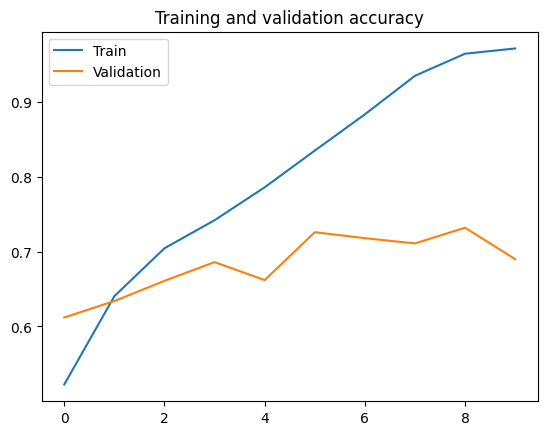

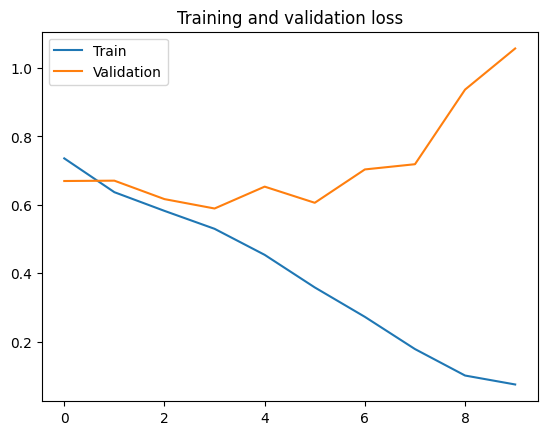

In [19]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))


In [21]:
import numpy as np

# I will predict the model outputs on our validation dataset
preds = model.predict(val_generator)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

50/50 [==============================] - 11s 209ms/step


In [23]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df)

{'cats': 0, 'dogs': 1}
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0         0        0.0          0.2908          Cat             Cat
1         0        1.0          0.7199          Cat             Dog
2         0        1.0          0.9973          Cat             Dog
3         0        0.0          0.0001          Cat             Cat
4         0        0.0          0.2691          Cat             Cat
..      ...        ...             ...          ...             ...
995       1        1.0          0.9538          Dog             Dog
996       1        1.0          1.0000          Dog             Dog
997       1        1.0          0.8586          Dog             Dog
998       1        1.0          0.9981          Dog             Dog
999       1        0.0          0.1864          Dog             Cat

[1000 rows x 5 columns]


              precision    recall  f1-score   support

        cats       0.70      0.86      0.77       500
        dogs       0.81      0.63      0.71       500

    accuracy                           0.74      1000
   macro avg       0.76      0.74      0.74      1000
weighted avg       0.76      0.74      0.74      1000



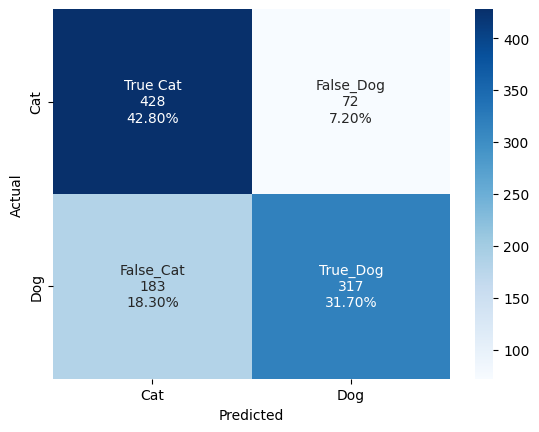

In [66]:
%matplotlib inline
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My first CNN has labelled 44.4% of images as cat and 55.6% as dog, with a validation accuracy of 69%.  If I stop training the model at the 6th epoch, I can achieve 72% validation accuracy and a lower validation loss. It has marginally better Precision when labelling the Cat images.

$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$ - What percentage of images were labelled correctly?

$Precision = \frac{TP}{TP+FP}$ - For all images that we have labelled as Cat/Dog, what proportion were actually Cat/Dog?

$Recall = \frac{TP}{TP+FN}$ - For all images actually marked as Cat/Dog, what proportion did we label correctly?

$F1 Score = \frac {TP}{TP+\frac{1}{2}(FP+FN)}$ - Weighted average of Precision & Recall

My next step is to improve upon this base model using image augmentation.

# <font color='Orange'> 4: Second CNN </font>

## <font color='Blue'> 4.1: Preventing overfitting using data augmentation

Similar to traditional machine learning, there are ways to prevent overfitting of a model, that is making a model more capable of correctly classifying new shapes or images. 

I've already used maxpooling to attempt to avoid overfitting, but another good methodis to increase the sample size or augment the data.

Image data can be augmented by transforming each image randomly. Zooming, flipping, rotating and cropping images are all augmentation methods that be applied to individual images randomly. By loading these in batches, my model is built using different images, helping it to recognise more different features in the images *(Perez and Wang, 2017)*.

In [25]:
# Setting up a generator that randomly adjusts each image according to parameters below
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=45, # degrees of rotation is up to 45
      width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
      height_shift_range=0.15, # shifts image vertically
      brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
      shear_range=0.2, # moves bottom of picture horizontally by up to 20%
      zoom_range=0.2, # zooms into picture by up to 20%
      horizontal_flip=True, # randomly flips image horizontally
      vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
      fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

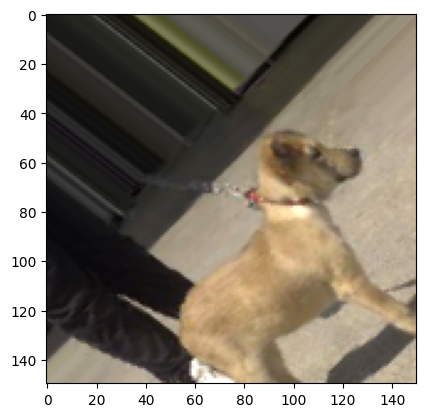

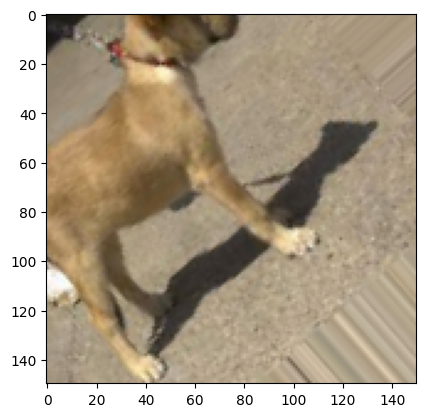

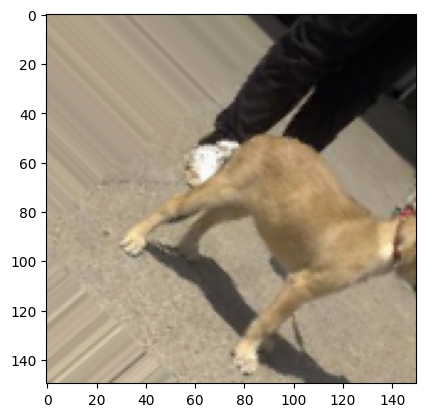

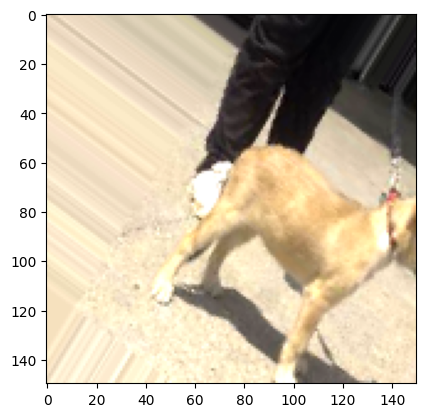

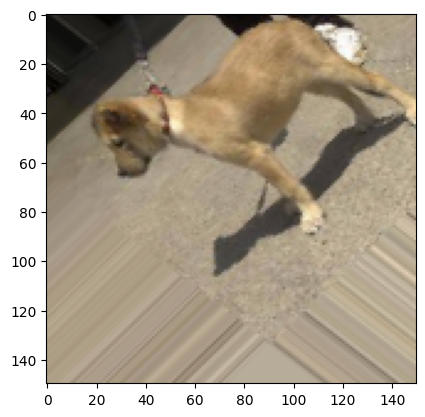

In [26]:
# Show random selection of augmented dogs
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

rand_index = np.random.randint(0, len(train_dog_fnames)) # choose random image number

img_path = os.path.join(train_dogs_dir, train_dog_fnames[rand_index])
img = load_img(img_path, target_size=(150, 150)) 
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Generates batches of randomly transformed images until i = j
i = 0
j = 5
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i == j:
    break

Now I can see that the augmentation is working, I will apply the same parameters to the training dataset, remembering to scale the RGB range. I will leave the validation dataset as it is, since we wouldn't expect to see augmented images presented for classification in the real world.

Data augmentation is one example of feature transference in that the increase in the size and variety of the training dataset makes a model work harder by learning new variants of images, helping to recognise these correctly with unseen data *(Atienza, 2021)*


In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45, # degrees of rotation is up to 45
    width_shift_range=0.15, # shifts image by up to 15% left or right horizontally
    height_shift_range=0.15, # shifts image vertically
    brightness_range=(0.8, 1.2), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        shuffle=True,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## <font color='Blue'>4.2: Architecture

I will now train a new CNN using the same architecture as previously so that I have a good measure of the impact of image augmentation.


In [59]:
# Bring in saved model architecture
from tensorflow.keras import models

model2 = models.load_model('1_cnn_model')
# Check architecture
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [60]:
# Train model with same parameters, loss, optimiser and evaluation metric
model2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model2.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 24s - loss: 0.6843 - accuracy: 0.6600 - val_loss: 0.5194 - val_accuracy: 0.7460 - 24s/epoch - 239ms/step
Epoch 2/10
100/100 - 22s - loss: 0.5693 - accuracy: 0.7055 - val_loss: 0.4911 - val_accuracy: 0.7540 - 22s/epoch - 217ms/step
Epoch 3/10
100/100 - 24s - loss: 0.5738 - accuracy: 0.7090 - val_loss: 0.4861 - val_accuracy: 0.7680 - 24s/epoch - 236ms/step
Epoch 4/10
100/100 - 23s - loss: 0.5613 - accuracy: 0.7095 - val_loss: 0.5053 - val_accuracy: 0.7500 - 23s/epoch - 227ms/step
Epoch 5/10
100/100 - 21s - loss: 0.5544 - accuracy: 0.7025 - val_loss: 0.5161 - val_accuracy: 0.7270 - 21s/epoch - 215ms/step
Epoch 6/10
100/100 - 22s - loss: 0.5398 - accuracy: 0.7240 - val_loss: 0.5010 - val_accuracy: 0.7540 - 22s/epoch - 217ms/step
Epoch 7/10
100/100 - 22s - loss: 0.5488 - accuracy: 0.7175 - val_loss: 0.4863 - val_accuracy: 0.7710 - 22s/epoch - 216ms/step
Epoch 8/10
100/100 - 21s - loss: 0.5253 - accuracy: 0.7325 - val_loss: 0.4746 - val_accuracy: 0.7590 - 21s/epoch - 205

## <font color='Blue'>4.3: Evaluation

Based on the loss and accuracy figures above, the model is now doing a better job of generalising as the accuracy and loss metrics are similar across both training and validation. There is a bit of choppiness to these scores as epochs are added, so as I move into hyperparameter tuning I could consider adding epochs to see if things improve.
 

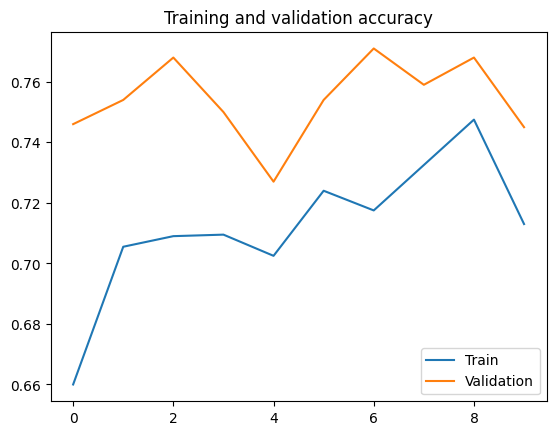

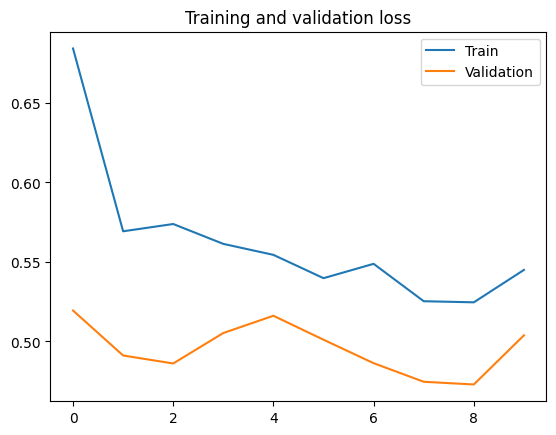

In [61]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

In [62]:
# I will predict the model outputs on our validation dataset
preds = model2.predict(val_generator, verbose=2)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
print(model2.predict(val_generator).shape)

50/50 - 3s - 3s/epoch - 60ms/step
50/50 [==============================] - 3s 62ms/step
(1000, 1)


In [63]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df.head(10))
print(df.tail(10))

{'cats': 0, 'dogs': 1}
   Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0       0        1.0          0.6094          Cat             Dog
1       0        0.0          0.3257          Cat             Cat
2       0        1.0          0.5274          Cat             Dog
3       0        0.0          0.0139          Cat             Cat
4       0        0.0          0.4224          Cat             Cat
5       0        0.0          0.1009          Cat             Cat
6       0        0.0          0.4599          Cat             Cat
7       0        0.0          0.0200          Cat             Cat
8       0        0.0          0.0172          Cat             Cat
9       0        1.0          0.6604          Cat             Dog
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
990       1        1.0          0.6879          Dog             Dog
991       1        1.0          0.9661          Dog             Dog
992       1        1.0          0.7452         

              precision    recall  f1-score   support

        cats       0.70      0.86      0.77       500
        dogs       0.81      0.63      0.71       500

    accuracy                           0.74      1000
   macro avg       0.76      0.74      0.74      1000
weighted avg       0.76      0.74      0.74      1000



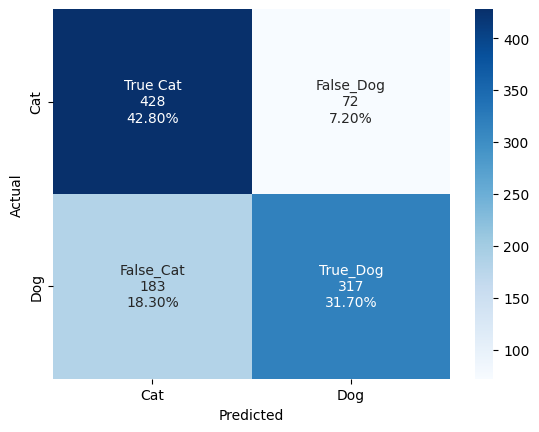

In [67]:
# Show confusion matrix & classification report
class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My second CNN has labelled 61.1% of images as cat and 38.9% as dog, with an improved validation accuracy of 74%.  If I stop training the model at the 6th epoch, I can achieve 77% validation accuracy. This time the model has better Recall for Cats, though this is negated by a poor precision as a result of the 183 falsely labelled Cat images.

Next I will see if I can improve the model further through hyperparameter tuning. 

#<font color='Orange'> 5: Third CNN

## <font color='Blue'> 5.1: Hyperparameter Optimisation using GridSearch

Blah blah blah

## <font color='Blue'> 5.2: Architecture

In [72]:
# Here I am programming the chosen CNN architecture
# 150x150x3 should be used to represent input feature map
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3 followed by max-pooling layer with a 2x2 window
# The stride refers to the number of pixels moved by the filter, while 'valid' padding means no white space will
# be added, hence the image will decrease in size. Both stride and padding values are default, so are shown
# here for demonstration purposes.
x = layers.Conv2D(16, (3, 3), activation='relu', strides=(1), padding='same')(img_input)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.2)(x)

# Second convolution extracts 32 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.2)(x)

# Third convolution extracts 64 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Dropout(0.2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)

#  Output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
model3 = Model(img_input, output)
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 73, 73, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                       

In [73]:
# Train model with same parameters, loss, optimiser and evaluation metric
model3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model3.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/50
100/100 - 24s - loss: 0.7657 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000 - 24s/epoch - 236ms/step
Epoch 2/50
100/100 - 21s - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5110 - 21s/epoch - 215ms/step
Epoch 3/50
100/100 - 23s - loss: 0.6929 - accuracy: 0.4860 - val_loss: 0.6914 - val_accuracy: 0.5330 - 23s/epoch - 230ms/step
Epoch 4/50
100/100 - 21s - loss: 0.6881 - accuracy: 0.5275 - val_loss: 0.6929 - val_accuracy: 0.5080 - 21s/epoch - 212ms/step
Epoch 5/50
100/100 - 22s - loss: 0.6937 - accuracy: 0.5060 - val_loss: 0.6925 - val_accuracy: 0.5070 - 22s/epoch - 217ms/step
Epoch 6/50
100/100 - 22s - loss: 0.6928 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.4940 - 22s/epoch - 216ms/step
Epoch 7/50
100/100 - 22s - loss: 0.6928 - accuracy: 0.5055 - val_loss: 0.6872 - val_accuracy: 0.5320 - 22s/epoch - 217ms/step
Epoch 8/50
100/100 - 21s - loss: 0.6909 - accuracy: 0.5150 - val_loss: 0.6833 - val_accuracy: 0.5700 - 21s/epoch - 205

## <font color='Blue'>5.3: Evaluation

Based on the loss and accuracy figures above, the model is now doing a better job of generalising as the accuracy and loss metrics are similar across both training and validation. There is a bit of choppiness to these scores as epochs are added, so as I move into hyperparameter tuning I could consider adding epochs to see if things improve.
 

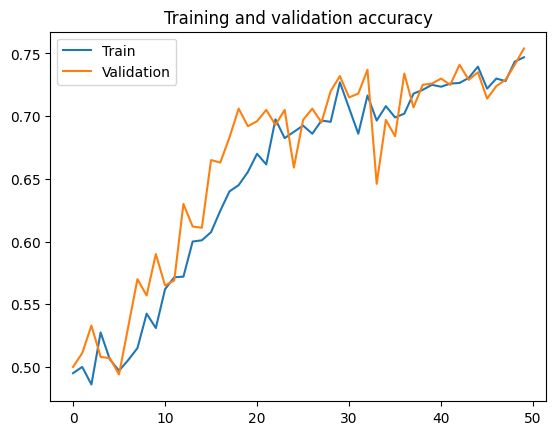

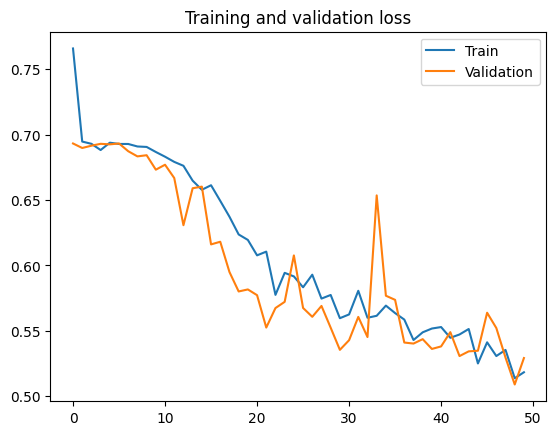

In [74]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

In [75]:
# I will predict the model outputs on our validation dataset
preds = model3.predict(val_generator, verbose=2)
y_pred = np.round(preds) # Takes Sigmoid output value between 0 and 1, which is probability of belonging positive class (1 = 
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())
print(model3.predict(val_generator).shape)

50/50 - 4s - 4s/epoch - 81ms/step
50/50 [==============================] - 3s 62ms/step
(1000, 1)


In [76]:
# Create dataframe showing Predicted outputs vs. Actual outputs with labels for validation dataset.
import pandas as pd

print(val_generator.class_indices)
df = pd.DataFrame({'Actual': np.ndarray.tolist(y_true), 
                       'Predicted': np.ndarray.tolist(y_pred), 
                       'Sigmoid output': np.ndarray.tolist(np.round((preds),4))})

df['Predicted'] = df['Predicted'].str.get(0)
df['Sigmoid output'] = df['Sigmoid output'].str.get(0)

# Add class labels
df['Actual_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Actual'] == 0:
        df.loc[i, 'Actual_Class'] = 'Cat'
    else:
        df.loc[i, 'Actual_Class'] = 'Dog'
df['Predicted_Class'] = ''
for i in range(len(df)):
    if df.loc[i, 'Predicted'] == 0:
        df.loc[i, 'Predicted_Class'] = 'Cat'
    else:
        df.loc[i, 'Predicted_Class'] = 'Dog'

print(df.head(10))
print(df.tail(10))

{'cats': 0, 'dogs': 1}
   Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
0       0        1.0          0.8933          Cat             Dog
1       0        0.0          0.3658          Cat             Cat
2       0        1.0          0.7216          Cat             Dog
3       0        0.0          0.0553          Cat             Cat
4       0        0.0          0.3786          Cat             Cat
5       0        0.0          0.0405          Cat             Cat
6       0        1.0          0.5069          Cat             Dog
7       0        0.0          0.3745          Cat             Cat
8       0        0.0          0.0928          Cat             Cat
9       0        0.0          0.2337          Cat             Cat
     Actual  Predicted  Sigmoid output Actual_Class Predicted_Class
990       1        0.0          0.2404          Dog             Cat
991       1        1.0          0.9928          Dog             Dog
992       1        1.0          0.6932         

              precision    recall  f1-score   support

        cats       0.71      0.85      0.78       500
        dogs       0.82      0.66      0.73       500

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000



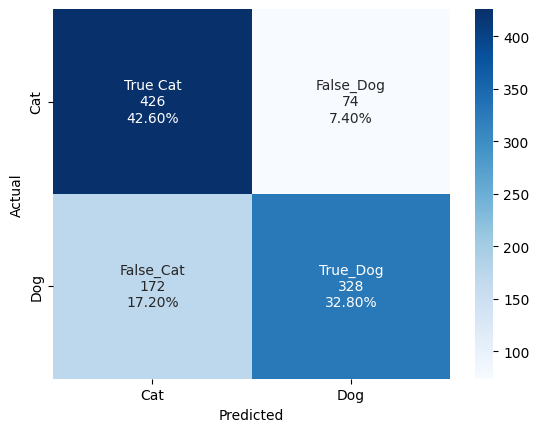

In [77]:
# Show confusion matrix & classification report
class_rep = classification_report(y_true, y_pred, target_names=class_names)
conf_mat = confusion_matrix(y_true, y_pred)

categories = ['Cat', 'Dog']
group_names = ['True Cat','False_Dog','False_Cat','True_Dog']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', 
            xticklabels=categories, 
            yticklabels=categories,
            cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(class_rep)

My second CNN has labelled 61.1% of images as cat and 38.9% as dog, with an improved validation accuracy of 74%.  If I stop training the model at the 6th epoch, I can achieve 77% validation accuracy. This time the model has better Recall for Cats, though this is negated by a poor precision as a result of the 183 falsely labelled Cat images.

Next I will see if I can improve the model further through hyperparameter tuning. 

#<font color='Orange'> 6: Fourth CNN

## <font color='Blue'> 6.1: Pre-trained architectures

## <font color='Blue'> 6.2: Architecture

## <font color='Blue'> 6.3: Evaluation

#<font color='Orange'> 7: Summary/Conclusion

#<font color='Orange'> References